In [57]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics
from skimage import exposure
from skimage.filters import threshold_otsu
from skimage.feature import hog
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

In [58]:
#importing the main folder and excel file
data_dir = '/content/drive/MyDrive/Eye/'
excel = pd.read_csv(data_dir+'data_information (1).csv')
#dividing it into 3 folders
cnv=excel[(excel['Class']=='CNV') & (excel['Label']=='CNV')]
normal=excel[(excel['Class']=='CNV') & (excel['Label']=='NORMAL')]
drusen = excel[(excel['Class']=='DRUSEN') & (excel['Label']=='DRUSEN')]
#making a sampled dataset which contain 300 images
cnv_subset = cnv.sample(n=400,random_state=42)
normal_subset = normal.sample(n=400,random_state=42)
drusen_subset = drusen.sample(n=400,random_state=42)
sampled_data = pd.concat([cnv_subset, normal_subset, drusen_subset], ignore_index=True)
drusen = pd.concat([normal_subset, drusen_subset], ignore_index=True)
cnv=pd.concat([cnv_subset, normal_subset], ignore_index=True)
both=pd.concat([cnv_subset,drusen_subset], ignore_index=True)

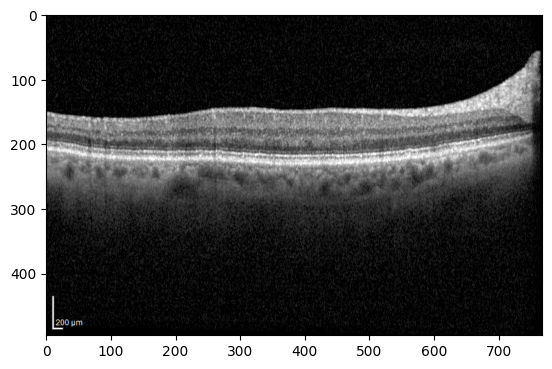

In [59]:
import cv2
images=[]
for i in drusen['Directory']:
  img = cv2.imread(data_dir+i)
  images.append(img)
plt.imshow(img, cmap='gray')

# **mean** **filter**

In [ ]:
import os
import cv2

# Load images, apply mean filter, and save the filtered images to a new folder
filtered_images_dir = '/content/drive/MyDrive/Eye/drusenFiltered/'

# Check if the directory exists, and if not, create it
if not os.path.exists(filtered_images_dir):
    os.makedirs(filtered_images_dir)

# Iterate through each row in the DataFrame 'cnv' to process images
for index, row in drusen.iterrows():
    img_path = data_dir + row['Directory']
    img = cv2.imread(img_path)
    if img is not None:
        # Apply mean filter
        filtered_img = cv2.blur(img, (3, 3))  # Adjust kernel size as needed

        # Save the filtered image to the new folder
        filename = os.path.basename(img_path)
        filtered_img_path = os.path.join(filtered_images_dir, filename)
        cv2.imwrite(filtered_img_path, filtered_img)

        print(f"Filtered image saved: {filtered_img_path}")
    else:
        print(f"Error: Unable to read image '{img_path}'")


In [ ]:
filtered_data_dir = '/content/drive/MyDrive/Eye/drusenFiltered/'
import cv2
import numpy as np
import os
from skimage.feature import greycomatrix, greycoprops  # Import graycoprops instead of graycoprops


# List to store GLCM features
glcm_features = []

# Iterate over the rows in the 'Directory' column of sampled_data
for index, row in drusen.iterrows():
    # Read the filtered image
    filtered_img_path = os.path.join(filtered_data_dir, os.path.basename(row['Directory']))
    filtered_img = cv2.imread(filtered_img_path)

    # Check if the filtered image was successfully loaded
    if filtered_img is not None:
        # Convert the image to grayscale
        gray_img = cv2.cvtColor(filtered_img, cv2.COLOR_BGR2GRAY)

        # Compute GLCM
        glcm = greycomatrix(gray_img, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)

        # Compute GLCM properties
        contrast = greycoprops(glcm, 'contrast')  # Use greycoprops instead of graycoprops
        dissimilarity = greycoprops(glcm, 'dissimilarity')
        homogeneity = greycoprops(glcm, 'homogeneity')
        energy = greycoprops(glcm, 'energy')
        correlation = greycoprops(glcm, 'correlation')

        # Append GLCM properties to the list
        glcm_features.append([contrast[0, 0], dissimilarity[0, 0], homogeneity[0, 0], energy[0, 0], correlation[0, 0]])

# Convert the list of GLCM features to a numpy array
glcm_features = np.array(glcm_features)

# Display sample GLCM features
print("GLCM features shape:", glcm_features.shape)
print("Sample GLCM features:")
print(glcm_features[:5])

In [24]:
# Assuming you have your target vector y as a pandas Series
y = drusen['Label']

# Encode the target vector
# Assign 0 for DRUSEN, 1 for CNV, and 2 for NORMAL
y_encoded = y.map({'NORMAL': 0, 'DRUSEN': 1})
X =glcm_features

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skim

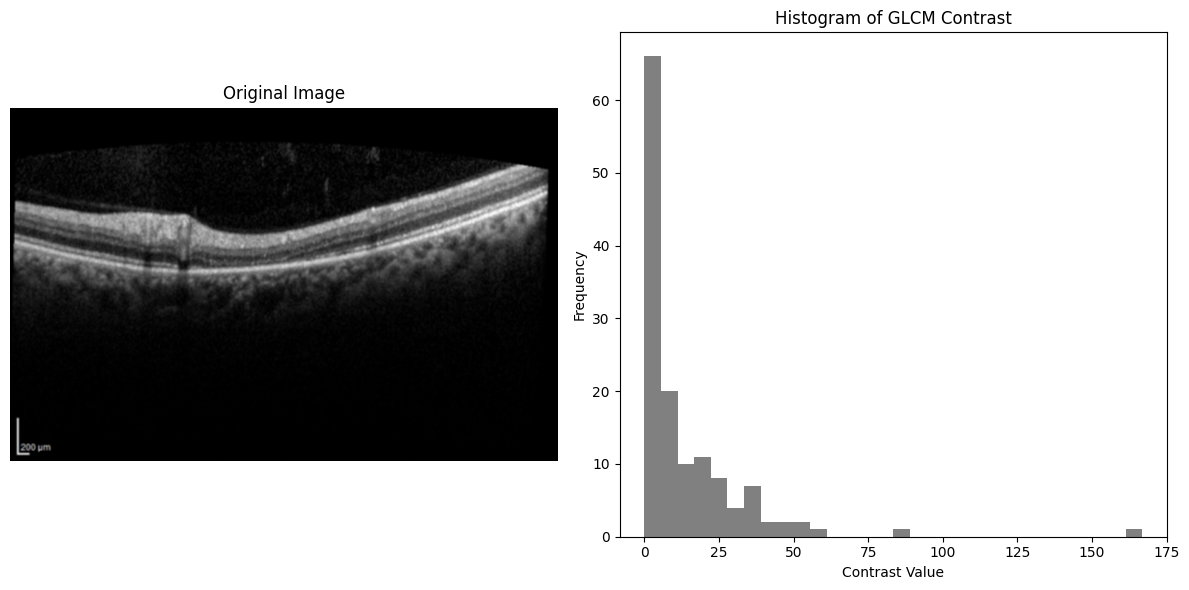

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_ubyte

def plot_glcm_properties_and_histogram(image_path):
    # Load the original image
    original_img = cv2.imread(image_path)
    if original_img is None:
        print("Image not loaded. Please check the path and file integrity.")
        return

    # Convert to grayscale
    gray_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
    gray_img = img_as_ubyte(gray_img)  # Ensure the image is in 8-bit, required for greycomatrix

    # Compute GLCM over the whole image for demonstration
    glcm = greycomatrix(gray_img, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    contrast = greycoprops(glcm, 'contrast')[0, 0]

    # Visualization of the original image
    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Histogram of Contrast
    # For this part, we will compute contrast for blocks of the image to get a distribution
    block_size = 50
    contrasts = []
    for i in range(0, gray_img.shape[0] - block_size + 1, block_size):
        for j in range(0, gray_img.shape[1] - block_size + 1, block_size):
            block = gray_img[i:i+block_size, j:j+block_size]
            block_glcm = greycomatrix(block, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
            block_contrast = greycoprops(block_glcm, 'contrast')
            contrasts.append(block_contrast[0, 0])

    # Plotting histogram of contrasts
    plt.subplot(122)
    plt.hist(contrasts, bins=30, color='gray')
    plt.title('Histogram of GLCM Contrast')
    plt.xlabel('Contrast Value')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

img_path = '/content/drive/MyDrive/Eye/cnvFiltered/000_CNV.tif'  # Adjust this path

plot_glcm_properties_and_histogram(img_path)


In [23]:
glcm_features = np.array(glcm_features)

# Display the shape of HOG features
print("Shape of glcm features:", glcm_features.shape)

Shape of glcm features: (800, 5)


In [25]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold
# Define your SVM classifier
svm_classifier = SVC(kernel="linear")

# Train your classifier using k-fold cross-validation
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm_classifier, X, y_encoded, cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean accuracy
mean_accuracy = cv_scores.mean()
print("Mean Accuracy:", mean_accuracy)

Cross-validation scores: [0.58125 0.5625  0.51875 0.56875 0.51875]
Mean Accuracy: 0.55


In [26]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression

# Define the number of folds for cross-validation
num_folds = 5

# Initialize the Logistic Regression classifier
logistic_regression_classifier = LogisticRegression()

# Initialize the k-fold cross-validation generator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores_lr = cross_val_score(logistic_regression_classifier, X, y_encoded, cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores with Logistic Regression:", cv_scores_lr)

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
mean_accuracy_lr = cv_scores_lr.mean()
std_dev_accuracy_lr = cv_scores_lr.std()
print("Mean Accuracy with Logistic Regression:", mean_accuracy_lr)
print("Standard Deviation of Accuracy with Logistic Regression:", std_dev_accuracy_lr)

Cross-validation scores with Logistic Regression: [0.5625  0.61875 0.5875  0.5625  0.55   ]
Mean Accuracy with Logistic Regression: 0.5762499999999999
Standard Deviation of Accuracy with Logistic Regression: 0.02449489742783178


In [27]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier

# Define the number of neighbors for KNN
num_neighbors = 5

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=num_neighbors)

# Define the number of folds for cross-validation
num_folds = 5

# Initialize the k-fold cross-validation generator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores_knn = cross_val_score(knn_classifier, X, y_encoded, cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores with KNN:", cv_scores_knn)

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
mean_accuracy_knn = cv_scores_knn.mean()
std_dev_accuracy_knn = cv_scores_knn.std()
print("Mean Accuracy with KNN:", mean_accuracy_knn)
print("Standard Deviation of Accuracy with KNN:", std_dev_accuracy_knn)

Cross-validation scores with KNN: [0.94375 0.95625 0.9     0.9375  0.95   ]
Mean Accuracy with KNN: 0.9375
Standard Deviation of Accuracy with KNN: 0.019764235376052364


In [28]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes classifier (Gaussian Naive Bayes)
nb_classifier = GaussianNB()

# Define the number of folds for cross-validation
num_folds = 5

# Initialize the k-fold cross-validation generator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores_nb = cross_val_score(nb_classifier, X, y_encoded, cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores with Naive Bayes:", cv_scores_nb)

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
mean_accuracy_nb = cv_scores_nb.mean()
std_dev_accuracy_nb = cv_scores_nb.std()
print("Mean Accuracy with Naive Bayes:", mean_accuracy_nb)
print("Standard Deviation of Accuracy with Naive Bayes:", std_dev_accuracy_nb)

Cross-validation scores with Naive Bayes: [0.59375 0.6     0.50625 0.5375  0.4875 ]
Mean Accuracy with Naive Bayes: 0.545
Standard Deviation of Accuracy with Naive Bayes: 0.04531142240097965


In [29]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
num_folds = 5

# Initialize the SVM classifier
svm_classifier = SVC(kernel='sigmoid')

# Initialize the k-fold cross-validation generator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores = cross_val_score(svm_classifier, X, y_encoded, cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
mean_accuracy = cv_scores.mean()
std_dev_accuracy = cv_scores.std()
print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_dev_accuracy)

Cross-validation scores: [0.54375 0.58125 0.4375  0.5     0.5    ]
Mean Accuracy: 0.5125
Standard Deviation of Accuracy: 0.04825064766404696


Gamma: 0.001, Mean Accuracy: 0.60625
Gamma: 0.01, Mean Accuracy: 0.6975
Gamma: 0.1, Mean Accuracy: 0.8250000000000002
Gamma: 1, Mean Accuracy: 0.8612499999999998
Gamma: 10, Mean Accuracy: 0.96875


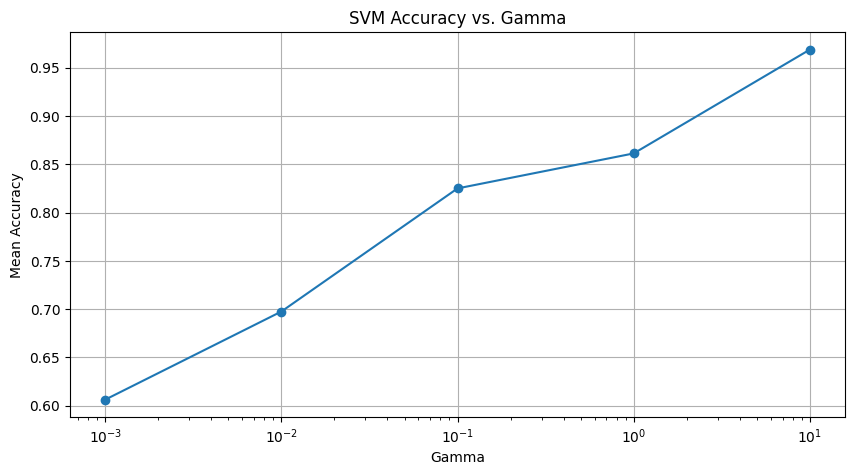

In [30]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC
import numpy as np

# Define your SVM classifier with varying gamma values
gamma_values = [0.001, 0.01, 0.1, 1, 10]
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize an empty list to store mean accuracies for each gamma
mean_accuracies = []

# Loop through each gamma value, train the SVM and calculate cross-validation scores
for gamma in gamma_values:
    svm_classifier = SVC(kernel="rbf", gamma=gamma)
    cv_scores = cross_val_score(svm_classifier, X, y_encoded, cv=kfold)
    mean_accuracy = cv_scores.mean()
    mean_accuracies.append(mean_accuracy)
    print(f"Gamma: {gamma}, Mean Accuracy: {mean_accuracy}")

# You could also plot these to see how gamma affects accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(gamma_values, mean_accuracies, marker='o')
plt.xlabel('Gamma')
plt.ylabel('Mean Accuracy')
plt.title('SVM Accuracy vs. Gamma')
plt.xscale('log')  # Since gamma values vary in orders of magnitude, log scale might be more informative
plt.grid(True)
plt.show()

Degree: 1, Cross-validation scores: [0.575   0.54375 0.475   0.5375  0.44375]
Degree: 1, Mean Accuracy: 0.515
Degree: 2, Cross-validation scores: [0.55625 0.55625 0.5     0.54375 0.5    ]
Degree: 2, Mean Accuracy: 0.53125
Degree: 3, Cross-validation scores: [0.58125 0.5875  0.55    0.60625 0.55   ]
Degree: 3, Mean Accuracy: 0.575
Degree: 4, Cross-validation scores: [0.59375 0.6     0.54375 0.61875 0.55625]
Degree: 4, Mean Accuracy: 0.5825
Degree: 5, Cross-validation scores: [0.5875  0.59375 0.54375 0.61875 0.55625]
Degree: 5, Mean Accuracy: 0.58


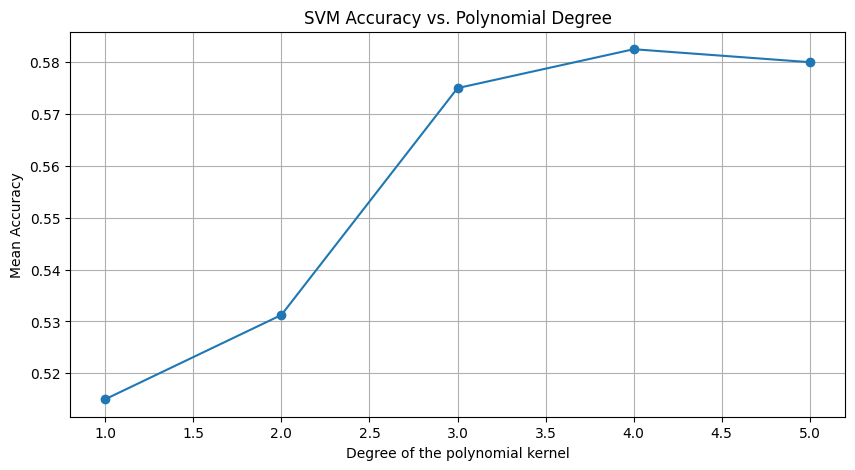

In [31]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC
import numpy as np

# Define your SVM classifier with varying degrees
degree_values = [1, 2, 3, 4, 5]  # Different degrees of the polynomial to test
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize an empty list to store mean accuracies for each degree
mean_accuracies = []

# Loop through each degree value, train the SVM and calculate cross-validation scores
for degree in degree_values:
    svm_classifier = SVC(kernel="poly", degree=degree)
    cv_scores = cross_val_score(svm_classifier, X, y_encoded, cv=kfold)
    mean_accuracy = cv_scores.mean()
    mean_accuracies.append(mean_accuracy)
    print(f"Degree: {degree}, Cross-validation scores: {cv_scores}")
    print(f"Degree: {degree}, Mean Accuracy: {mean_accuracy}")

# Optionally, you could plot these to visualize how the degree affects accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(degree_values, mean_accuracies, marker='o')
plt.xlabel('Degree of the polynomial kernel')
plt.ylabel('Mean Accuracy')
plt.title('SVM Accuracy vs. Polynomial Degree')
plt.grid(True)
plt.show()

In [32]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold

# Define the number of folds for cross-validation
num_folds = 5

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Initialize the k-fold cross-validation generator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores = cross_val_score(xgb_classifier, X, y_encoded, cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores with XGBoost:", cv_scores)

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
mean_accuracy = cv_scores.mean()
std_dev_accuracy = cv_scores.std()
print("Mean Accuracy with XGBoost:", mean_accuracy)
print("Standard Deviation of Accuracy with XGBoost:", std_dev_accuracy)

Cross-validation scores with XGBoost: [0.98125 0.98125 0.96875 1.      1.     ]
Mean Accuracy with XGBoost: 0.9862500000000001
Standard Deviation of Accuracy with XGBoost: 0.012119199643540829


# **guassian**

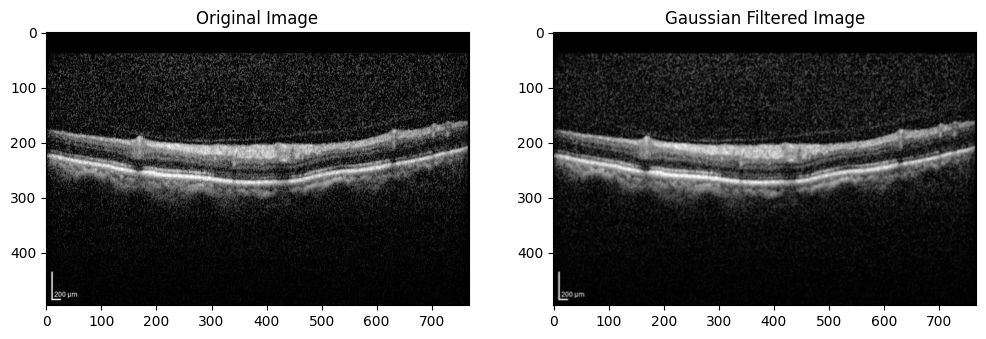

Directory /content/drive/MyDrive/drusenGaussianFil/012_Drusen.tif could not be accessed or does not exist.


In [33]:
import cv2
import os
import matplotlib.pyplot as plt

# Define your base directory and new directory for the filtered images
data_dir = '/content/drive/MyDrive/Eye/'
filtered_dir = '/content/drive/MyDrive/drusenGaussianFil'

# Create the filtered images directory if it doesn't already exist
if not os.path.exists(filtered_dir):
    os.makedirs(filtered_dir)

for idx, entry in drusen.iterrows():
    img_path = os.path.join(data_dir, entry['Directory'])
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        # Apply Gaussian Blur
        filtered_img = cv2.GaussianBlur(img, (3, 3), 0)

        # Save the filtered image
        save_path = os.path.join(filtered_dir, os.path.basename(entry['Directory']))
        cv2.imwrite(save_path, filtered_img)

        # Optionally, show the first image's original and filtered version for verification
        if idx == 0:
            plt.figure(figsize=(12, 6))
            plt.subplot(1, 2, 1)
            plt.imshow(img, cmap='gray')
            plt.title('Original Image')
            plt.subplot(1, 2, 2)
            plt.imshow(filtered_img, cmap='gray')
            plt.title('Gaussian Filtered Image')
            plt.show()
    else:
        print(f"Failed to load image at {img_path}")
else:
    print(f"Directory {save_path} could not be accessed or does not exist.")


In [ ]:
filtered_data_dir = '/content/drive/MyDrive/drusenGaussianFil'
import cv2
import numpy as np
import os
from skimage.feature import greycomatrix, greycoprops  # Import graycoprops instead of graycoprops


# List to store GLCM features
glcm_features = []

# Iterate over the rows in the 'Directory' column of sampled_data
for index, row in drusen.iterrows():
    # Read the filtered image
    filtered_img_path = os.path.join(filtered_data_dir, os.path.basename(row['Directory']))
    filtered_img = cv2.imread(filtered_img_path)

    # Check if the filtered image was successfully loaded
    if filtered_img is not None:
        # Convert the image to grayscale
        gray_img = cv2.cvtColor(filtered_img, cv2.COLOR_BGR2GRAY)

        # Compute GLCM
        glcm = greycomatrix(gray_img, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)

        # Compute GLCM properties
        contrast = greycoprops(glcm, 'contrast')  # Use greycoprops instead of graycoprops
        dissimilarity = greycoprops(glcm, 'dissimilarity')
        homogeneity = greycoprops(glcm, 'homogeneity')
        energy = greycoprops(glcm, 'energy')
        correlation = greycoprops(glcm, 'correlation')

        # Append GLCM properties to the list
        glcm_features.append([contrast[0, 0], dissimilarity[0, 0], homogeneity[0, 0], energy[0, 0], correlation[0, 0]])

# Convert the list of GLCM features to a numpy array
glcm_features = np.array(glcm_features)

# Display sample GLCM features
print("GLCM features shape:", glcm_features.shape)
print("Sample GLCM features:")
print(glcm_features[:5])

In [35]:
# Assuming you have your target vector y as a pandas Series
y = drusen['Label']

# Encode the target vector
# Assign 0 for DRUSEN, 1 for CNV, and 2 for NORMAL
y_encoded = y.map({'NORMAL': 0, 'DRUSEN': 1})
X =glcm_features

In [36]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold
# Define your SVM classifier
svm_classifier = SVC(kernel="linear")

# Train your classifier using k-fold cross-validation
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm_classifier, X, y_encoded, cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean accuracy
mean_accuracy = cv_scores.mean()
print("Mean Accuracy:", mean_accuracy)

Cross-validation scores: [0.5875  0.575   0.51875 0.56875 0.51875]
Mean Accuracy: 0.55375


In [37]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold
# Define your SVM classifier
svm_classifier = SVC(kernel="sigmoid")

# Train your classifier using k-fold cross-validation
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm_classifier, X, y_encoded, cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean accuracy
mean_accuracy = cv_scores.mean()
print("Mean Accuracy:", mean_accuracy)

Cross-validation scores: [0.5625  0.54375 0.6     0.53125 0.45   ]
Mean Accuracy: 0.5375


Gamma: 0.001, Mean Accuracy: 0.6674999999999999
Gamma: 0.01, Mean Accuracy: 0.72
Gamma: 0.1, Mean Accuracy: 0.8200000000000001
Gamma: 1, Mean Accuracy: 0.9
Gamma: 10, Mean Accuracy: 0.96125


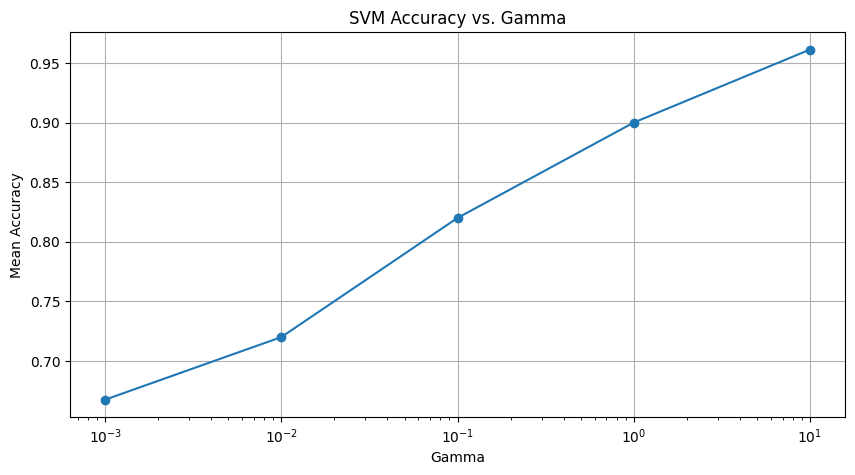

In [38]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC
import numpy as np

# Define your SVM classifier with varying gamma values
gamma_values = [0.001, 0.01, 0.1, 1, 10]
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize an empty list to store mean accuracies for each gamma
mean_accuracies = []

# Loop through each gamma value, train the SVM and calculate cross-validation scores
for gamma in gamma_values:
    svm_classifier = SVC(kernel="rbf", gamma=gamma)
    cv_scores = cross_val_score(svm_classifier, X, y_encoded, cv=kfold)
    mean_accuracy = cv_scores.mean()
    mean_accuracies.append(mean_accuracy)
    print(f"Gamma: {gamma}, Mean Accuracy: {mean_accuracy}")

# You could also plot these to see how gamma affects accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(gamma_values, mean_accuracies, marker='o')
plt.xlabel('Gamma')
plt.ylabel('Mean Accuracy')
plt.title('SVM Accuracy vs. Gamma')
plt.xscale('log')  # Since gamma values vary in orders of magnitude, log scale might be more informative
plt.grid(True)
plt.show()

Degree: 1, Cross-validation scores: [0.58125 0.4875  0.4375  0.43125 0.49375]
Degree: 1, Mean Accuracy: 0.48624999999999996
Degree: 2, Cross-validation scores: [0.575   0.54375 0.45    0.4375  0.49375]
Degree: 2, Mean Accuracy: 0.4999999999999999
Degree: 3, Cross-validation scores: [0.59375 0.6     0.55    0.5375  0.55625]
Degree: 3, Mean Accuracy: 0.5675
Degree: 4, Cross-validation scores: [0.59375 0.6     0.54375 0.61875 0.55625]
Degree: 4, Mean Accuracy: 0.5825
Degree: 5, Cross-validation scores: [0.59375 0.6     0.54375 0.61875 0.55625]
Degree: 5, Mean Accuracy: 0.5825


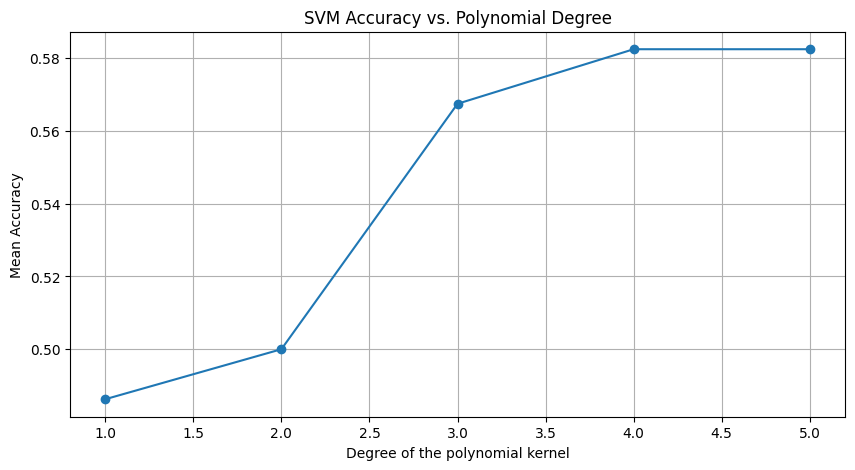

In [39]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC
import numpy as np

# Define your SVM classifier with varying degrees
degree_values = [1, 2, 3, 4, 5]  # Different degrees of the polynomial to test
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize an empty list to store mean accuracies for each degree
mean_accuracies = []

# Loop through each degree value, train the SVM and calculate cross-validation scores
for degree in degree_values:
    svm_classifier = SVC(kernel="poly", degree=degree)
    cv_scores = cross_val_score(svm_classifier, X, y_encoded, cv=kfold)
    mean_accuracy = cv_scores.mean()
    mean_accuracies.append(mean_accuracy)
    print(f"Degree: {degree}, Cross-validation scores: {cv_scores}")
    print(f"Degree: {degree}, Mean Accuracy: {mean_accuracy}")

# Optionally, you could plot these to visualize how the degree affects accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(degree_values, mean_accuracies, marker='o')
plt.xlabel('Degree of the polynomial kernel')
plt.ylabel('Mean Accuracy')
plt.title('SVM Accuracy vs. Polynomial Degree')
plt.grid(True)
plt.show()

In [40]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression

# Define the number of folds for cross-validation
num_folds = 5

# Initialize the Logistic Regression classifier
logistic_regression_classifier = LogisticRegression()

# Initialize the k-fold cross-validation generator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores_lr = cross_val_score(logistic_regression_classifier, X, y_encoded, cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores with Logistic Regression:", cv_scores_lr)

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
mean_accuracy_lr = cv_scores_lr.mean()
std_dev_accuracy_lr = cv_scores_lr.std()
print("Mean Accuracy with Logistic Regression:", mean_accuracy_lr)
print("Standard Deviation of Accuracy with Logistic Regression:", std_dev_accuracy_lr)

Cross-validation scores with Logistic Regression: [0.6375 0.6125 0.55   0.6125 0.55  ]
Mean Accuracy with Logistic Regression: 0.5925
Standard Deviation of Accuracy with Logistic Regression: 0.035881750236018285


In [41]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier

# Define the number of neighbors for KNN
num_neighbors = 5

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=num_neighbors)

# Define the number of folds for cross-validation
num_folds = 5

# Initialize the k-fold cross-validation generator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores_knn = cross_val_score(knn_classifier, X, y_encoded, cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores with KNN:", cv_scores_knn)

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
mean_accuracy_knn = cv_scores_knn.mean()
std_dev_accuracy_knn = cv_scores_knn.std()
print("Mean Accuracy with KNN:", mean_accuracy_knn)
print("Standard Deviation of Accuracy with KNN:", std_dev_accuracy_knn)

Cross-validation scores with KNN: [0.9375  0.94375 0.9     0.93125 0.9375 ]
Mean Accuracy with KNN: 0.93
Standard Deviation of Accuracy with KNN: 0.015512092057488557


In [42]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes classifier (Gaussian Naive Bayes)
nb_classifier = GaussianNB()

# Define the number of folds for cross-validation
num_folds = 5

# Initialize the k-fold cross-validation generator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores_nb = cross_val_score(nb_classifier, X, y_encoded, cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores with Naive Bayes:", cv_scores_nb)

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
mean_accuracy_nb = cv_scores_nb.mean()
std_dev_accuracy_nb = cv_scores_nb.std()
print("Mean Accuracy with Naive Bayes:", mean_accuracy_nb)
print("Standard Deviation of Accuracy with Naive Bayes:", std_dev_accuracy_nb)

Cross-validation scores with Naive Bayes: [0.475   0.4875  0.51875 0.4875  0.49375]
Mean Accuracy with Naive Bayes: 0.4925
Standard Deviation of Accuracy with Naive Bayes: 0.014469796128487807


In [43]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold

# Define the number of folds for cross-validation
num_folds = 5

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Initialize the k-fold cross-validation generator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores = cross_val_score(xgb_classifier, X, y_encoded, cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores with XGBoost:", cv_scores)

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
mean_accuracy = cv_scores.mean()
std_dev_accuracy = cv_scores.std()
print("Mean Accuracy with XGBoost:", mean_accuracy)
print("Standard Deviation of Accuracy with XGBoost:", std_dev_accuracy)

Cross-validation scores with XGBoost: [0.9875  0.96875 0.975   1.      0.99375]
Mean Accuracy with XGBoost: 0.985
Standard Deviation of Accuracy with XGBoost: 0.011592023119369639


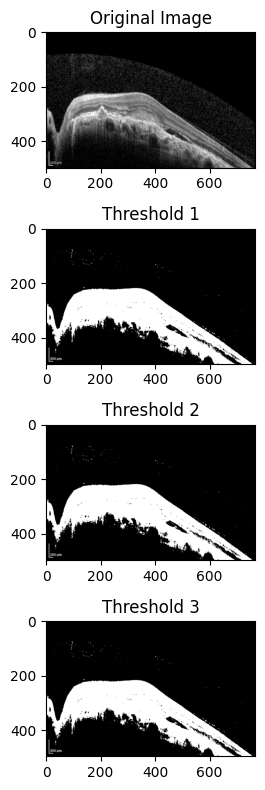

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to perform multilevel thresholding using Otsu's method
def multilevel_thresholding(image, num_thresholds):
    # Convert the image to grayscale
    gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Otsu's thresholding to find the initial threshold
    _, initial_threshold = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Initialize the thresholds list with the initial threshold
    thresholds = [initial_threshold]

    # Calculate additional thresholds based on the initial threshold
    for _ in range(num_thresholds - 1):
        # Use the previous threshold as a mask to exclude pixels that have already been segmented
        masked_img = cv2.bitwise_and(gray_img, initial_threshold)

        # Apply Otsu's thresholding to find the next threshold
        _, threshold = cv2.threshold(masked_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Add the new threshold to the list
        thresholds.append(threshold)

        # Update the initial threshold by bitwise OR operation with the new threshold
        initial_threshold = cv2.bitwise_or(initial_threshold, threshold)

    return thresholds

# Select a random image from the dataset
idx = np.random.randint(len(cnv))
img_path = os.path.join(data_dir, cnv['Directory'].iloc[idx])
img = cv2.imread(img_path)

# Perform multilevel thresholding with 3 thresholds
num_thresholds = 3
thresholds = multilevel_thresholding(img, num_thresholds)

# Plot the original image and the thresholded images
plt.figure(figsize=(12, 8))
plt.subplot(num_thresholds + 1, 1, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

for i in range(num_thresholds):
    plt.subplot(num_thresholds + 1, 1, i + 2)
    plt.imshow(thresholds[i], cmap='gray')
    plt.title(f'Threshold {i+1}')

plt.tight_layout()
plt.show()

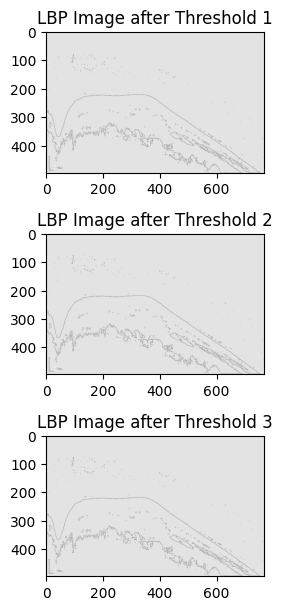

In [45]:
from skimage.feature import local_binary_pattern

# Function to apply LBP
def apply_lbp(image):
    # Compute LBP
    radius = 1
    n_points = 8 * radius
    lbp_image = local_binary_pattern(image, n_points, radius, method='uniform')
    return lbp_image

# Apply LBP to each thresholded image
lbp_images = [apply_lbp(threshold) for threshold in thresholds]

# Plot the LBP images
plt.figure(figsize=(12, 8))
for i, lbp_image in enumerate(lbp_images):
    plt.subplot(num_thresholds + 1, 1, i + 2)
    plt.imshow(lbp_image, cmap='gray')
    plt.title(f'LBP Image after Threshold {i+1}')

plt.tight_layout()
plt.show()

# **filetring**

In [46]:
import cv2
import numpy as np
import os
from skimage import io  # Used for reading images if cv2 fails

# Define directories
data_dir = '/content/drive/MyDrive/Eye/'
save_dir = '/content/drive/MyDrive/drusenMultilevel'

# Ensure the save directory exists
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Function to apply multilevel thresholding using k-means clustering
def multilevel_thresholding(image_path, k=3):
    # Read the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        img = io.imread(image_path, as_gray=True)  # Fallback using skimage
        if img is None:
            return None
        img = (img * 255).astype(np.uint8)  # skimage returns [0,1] float image

    # Reshape the image to a 2D array of pixels
    Z = img.reshape((-1, 1))

    # Convert to float
    Z = np.float32(Z)

    # Define criteria and apply kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    ret, label, center = cv2.kmeans(Z, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Convert back into uint8, and make original image shape
    center = np.uint8(center)
    res = center[label.flatten()]
    segmented_image = res.reshape((img.shape))

    return segmented_image

# Apply multilevel thresholding to each image in the sampled dataset
for idx, row in drusen.iterrows():
    image_path = os.path.join(data_dir, row['Directory'])
    result_image = multilevel_thresholding(image_path, k=3)  # Set k to the desired number of levels

    if result_image is not None:
        # Save the processed image
        save_path = os.path.join(save_dir, os.path.basename(row['Directory']))
        cv2.imwrite(save_path, result_image)
    else:
        print(f"Failed to load/process image: {row['Directory']}")

print("All images processed and saved to", save_dir)


All images processed and saved to /content/drive/MyDrive/drusenMultilevel


In [ ]:
filtered_data_dir ='/content/drive/MyDrive/drusenMultilevel'
import cv2
import numpy as np
import os
from skimage.feature import greycomatrix, greycoprops  # Import graycoprops instead of graycoprops


# List to store GLCM features
glcm_features = []

# Iterate over the rows in the 'Directory' column of sampled_data
for index, row in drusen.iterrows():
    # Read the filtered image
    filtered_img_path = os.path.join(filtered_data_dir, os.path.basename(row['Directory']))
    filtered_img = cv2.imread(filtered_img_path)

    # Check if the filtered image was successfully loaded
    if filtered_img is not None:
        # Convert the image to grayscale
        gray_img = cv2.cvtColor(filtered_img, cv2.COLOR_BGR2GRAY)

        # Compute GLCM
        glcm = greycomatrix(gray_img, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)

        # Compute GLCM properties
        contrast = greycoprops(glcm, 'contrast')  # Use greycoprops instead of graycoprops
        dissimilarity = greycoprops(glcm, 'dissimilarity')
        homogeneity = greycoprops(glcm, 'homogeneity')
        energy = greycoprops(glcm, 'energy')
        correlation = greycoprops(glcm, 'correlation')

        # Append GLCM properties to the list
        glcm_features.append([contrast[0, 0], dissimilarity[0, 0], homogeneity[0, 0], energy[0, 0], correlation[0, 0]])

# Convert the list of GLCM features to a numpy array
glcm_features = np.array(glcm_features)

# Display sample GLCM features
print("GLCM features shape:", glcm_features.shape)
print("Sample GLCM features:")
print(glcm_features[:5])

In [48]:
# Assuming you have your target vector y as a pandas Series
y = drusen['Label']

# Encode the target vector
# Assign 0 for DRUSEN, 1 for CNV, and 2 for NORMAL
y_encoded = y.map({'NORMAL': 0, 'DRUSEN': 1})
X = glcm_features

In [49]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold
# Define your SVM classifier
svm_classifier = SVC(kernel="linear")

# Train your classifier using k-fold cross-validation
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm_classifier, X, y_encoded, cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean accuracy
mean_accuracy = cv_scores.mean()
print("Mean Accuracy:", mean_accuracy)

Cross-validation scores: [0.58125 0.54375 0.5125  0.55625 0.5125 ]
Mean Accuracy: 0.54125


In [50]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold
# Define your SVM classifier
svm_classifier = SVC(kernel="sigmoid")

# Train your classifier using k-fold cross-validation
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm_classifier, X, y_encoded, cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean accuracy
mean_accuracy = cv_scores.mean()
print("Mean Accuracy:", mean_accuracy)

Cross-validation scores: [0.6375  0.70625 0.4375  0.575   0.6    ]
Mean Accuracy: 0.59125


Degree: 1, Cross-validation scores: [0.56875 0.5375  0.5125  0.5625  0.4875 ]
Degree: 1, Mean Accuracy: 0.53375
Degree: 2, Cross-validation scores: [0.59375 0.5625  0.53125 0.575   0.51875]
Degree: 2, Mean Accuracy: 0.55625
Degree: 3, Cross-validation scores: [0.55625 0.55625 0.5     0.575   0.5    ]
Degree: 3, Mean Accuracy: 0.5375
Degree: 4, Cross-validation scores: [0.575   0.55625 0.5375  0.5875  0.53125]
Degree: 4, Mean Accuracy: 0.5575
Degree: 5, Cross-validation scores: [0.575   0.58125 0.55    0.60625 0.55   ]
Degree: 5, Mean Accuracy: 0.5725


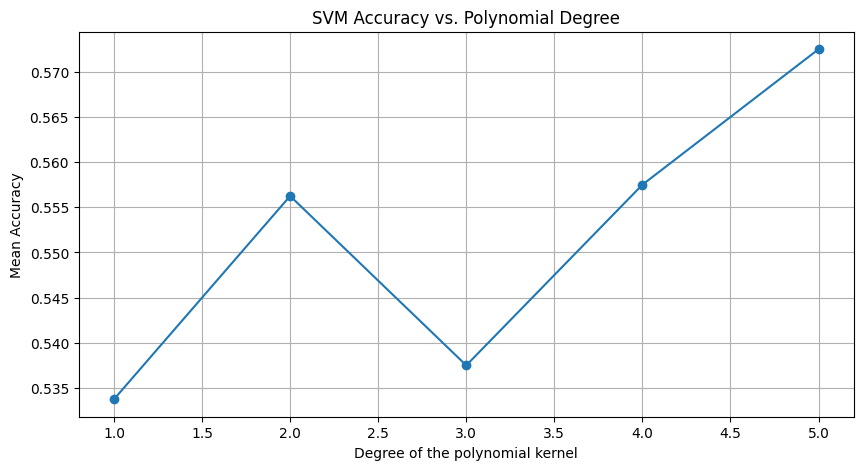

In [51]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC
import numpy as np

# Define your SVM classifier with varying degrees
degree_values = [1, 2, 3, 4, 5]  # Different degrees of the polynomial to test
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize an empty list to store mean accuracies for each degree
mean_accuracies = []

# Loop through each degree value, train the SVM and calculate cross-validation scores
for degree in degree_values:
    svm_classifier = SVC(kernel="poly", degree=degree)
    cv_scores = cross_val_score(svm_classifier, X, y_encoded, cv=kfold)
    mean_accuracy = cv_scores.mean()
    mean_accuracies.append(mean_accuracy)
    print(f"Degree: {degree}, Cross-validation scores: {cv_scores}")
    print(f"Degree: {degree}, Mean Accuracy: {mean_accuracy}")

# Optionally, you could plot these to visualize how the degree affects accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(degree_values, mean_accuracies, marker='o')
plt.xlabel('Degree of the polynomial kernel')
plt.ylabel('Mean Accuracy')
plt.title('SVM Accuracy vs. Polynomial Degree')
plt.grid(True)
plt.show()

Gamma: 0.001, Mean Accuracy: 0.73125
Gamma: 0.01, Mean Accuracy: 0.8550000000000001
Gamma: 0.1, Mean Accuracy: 0.915
Gamma: 1, Mean Accuracy: 0.96875
Gamma: 10, Mean Accuracy: 0.96875


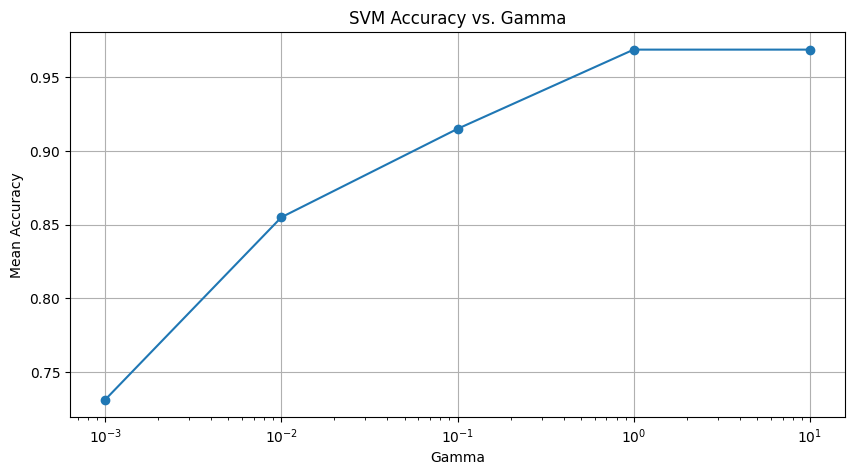

In [52]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC
import numpy as np

# Define your SVM classifier with varying gamma values
gamma_values = [0.001, 0.01, 0.1, 1, 10]
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize an empty list to store mean accuracies for each gamma
mean_accuracies = []

# Loop through each gamma value, train the SVM and calculate cross-validation scores
for gamma in gamma_values:
    svm_classifier = SVC(kernel="rbf", gamma=gamma)
    cv_scores = cross_val_score(svm_classifier, X, y_encoded, cv=kfold)
    mean_accuracy = cv_scores.mean()
    mean_accuracies.append(mean_accuracy)
    print(f"Gamma: {gamma}, Mean Accuracy: {mean_accuracy}")

# You could also plot these to see how gamma affects accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(gamma_values, mean_accuracies, marker='o')
plt.xlabel('Gamma')
plt.ylabel('Mean Accuracy')
plt.title('SVM Accuracy vs. Gamma')
plt.xscale('log')  # Since gamma values vary in orders of magnitude, log scale might be more informative
plt.grid(True)
plt.show()

In [53]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression

# Define the number of folds for cross-validation
num_folds = 5

# Initialize the Logistic Regression classifier
logistic_regression_classifier = LogisticRegression()

# Initialize the k-fold cross-validation generator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores_lr = cross_val_score(logistic_regression_classifier, X, y_encoded, cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores with Logistic Regression:", cv_scores_lr)

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
mean_accuracy_lr = cv_scores_lr.mean()
std_dev_accuracy_lr = cv_scores_lr.std()
print("Mean Accuracy with Logistic Regression:", mean_accuracy_lr)
print("Standard Deviation of Accuracy with Logistic Regression:", std_dev_accuracy_lr)

Cross-validation scores with Logistic Regression: [0.65625 0.5375  0.60625 0.63125 0.5625 ]
Mean Accuracy with Logistic Regression: 0.59875
Standard Deviation of Accuracy with Logistic Regression: 0.04355312847546086


In [54]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier

# Define the number of neighbors for KNN
num_neighbors = 5

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=num_neighbors)

# Define the number of folds for cross-validation
num_folds = 5

# Initialize the k-fold cross-validation generator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores_knn = cross_val_score(knn_classifier, X, y_encoded, cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores with KNN:", cv_scores_knn)

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
mean_accuracy_knn = cv_scores_knn.mean()
std_dev_accuracy_knn = cv_scores_knn.std()
print("Mean Accuracy with KNN:", mean_accuracy_knn)
print("Standard Deviation of Accuracy with KNN:", std_dev_accuracy_knn)

Cross-validation scores with KNN: [0.925   0.9625  0.89375 0.925   0.95625]
Mean Accuracy with KNN: 0.9324999999999999
Standard Deviation of Accuracy with KNN: 0.024811791551599006


In [55]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes classifier (Gaussian Naive Bayes)
nb_classifier = GaussianNB()

# Define the number of folds for cross-validation
num_folds = 5

# Initialize the k-fold cross-validation generator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores_nb = cross_val_score(nb_classifier, X, y_encoded, cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores with Naive Bayes:", cv_scores_nb)

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
mean_accuracy_nb = cv_scores_nb.mean()
std_dev_accuracy_nb = cv_scores_nb.std()
print("Mean Accuracy with Naive Bayes:", mean_accuracy_nb)
print("Standard Deviation of Accuracy with Naive Bayes:", std_dev_accuracy_nb)

Cross-validation scores with Naive Bayes: [0.58125 0.55    0.5125  0.575   0.50625]
Mean Accuracy with Naive Bayes: 0.545
Standard Deviation of Accuracy with Naive Bayes: 0.030973779233409687


In [56]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold

# Define the number of folds for cross-validation
num_folds = 5

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Initialize the k-fold cross-validation generator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores = cross_val_score(xgb_classifier, X, y_encoded, cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores with XGBoost:", cv_scores)

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
mean_accuracy = cv_scores.mean()
std_dev_accuracy = cv_scores.std()
print("Mean Accuracy with XGBoost:", mean_accuracy)
print("Standard Deviation of Accuracy with XGBoost:", std_dev_accuracy)

Cross-validation scores with XGBoost: [0.98125 0.9875  0.96875 1.      1.     ]
Mean Accuracy with XGBoost: 0.9875
Standard Deviation of Accuracy with XGBoost: 0.011858541225631427
